Import Modules

In [92]:
%pip install seaborn

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Titanic Dataset

In [94]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocessing Data

In [95]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [96]:
age_mean = df["Age"].mean()
age_mean

29.69911764705882

In [97]:
df["Age"].fillna(age_mean, inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [98]:
df = df[["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Embarked"]]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [99]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [100]:
df.dropna(inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


EDA & Exploring the relationships between variables

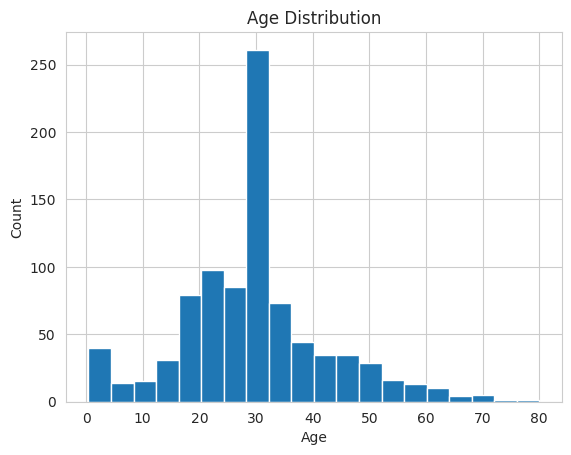

In [101]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

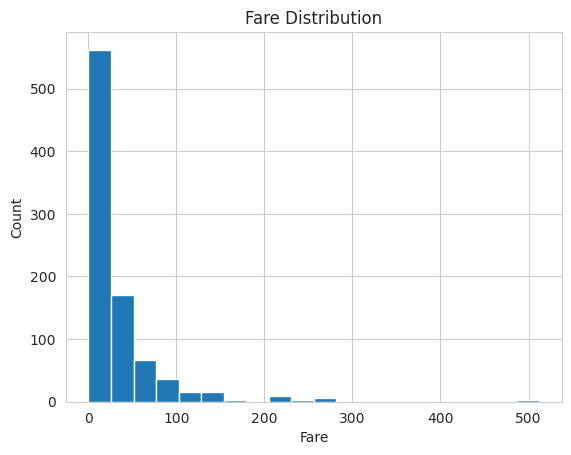

In [102]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [103]:
sex_survived = df.groupby('Sex')['Survived'].mean()*100
print("Survival Rate by Sex:")
print(sex_survived)

Survival Rate by Sex:
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64


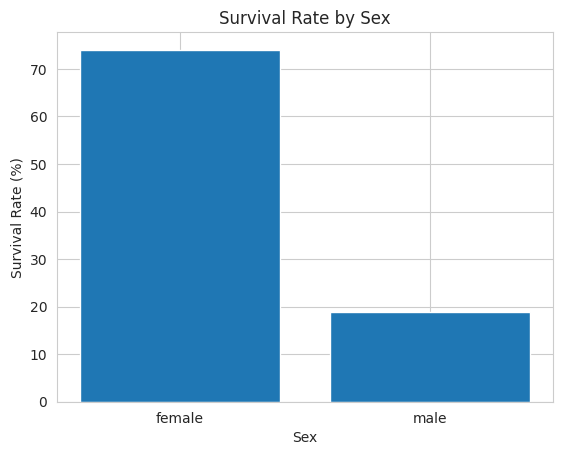

In [104]:
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

In [105]:
pclass_survived = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rate by Pclass:")
print(pclass_survived)

Survival Rate by Pclass:
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


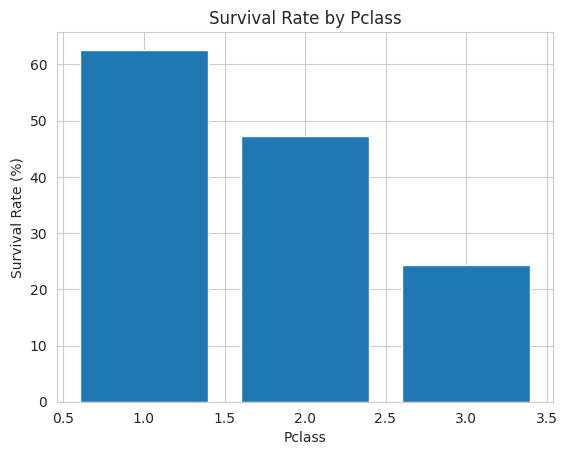

In [106]:
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

<ipython-input-107-d2b736fdcb00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Blues")


<AxesSubplot:xlabel='Survived', ylabel='count'>

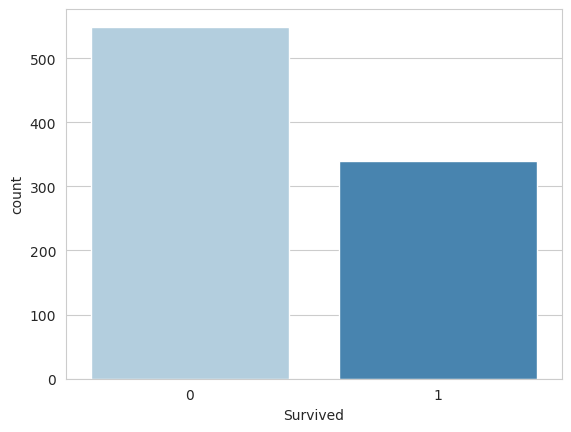

In [107]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df, palette="Blues")

<AxesSubplot:xlabel='Survived', ylabel='count'>

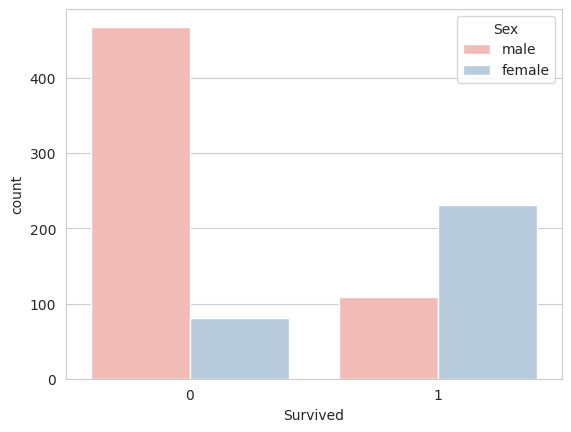

In [108]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=df, palette="Pastel1")

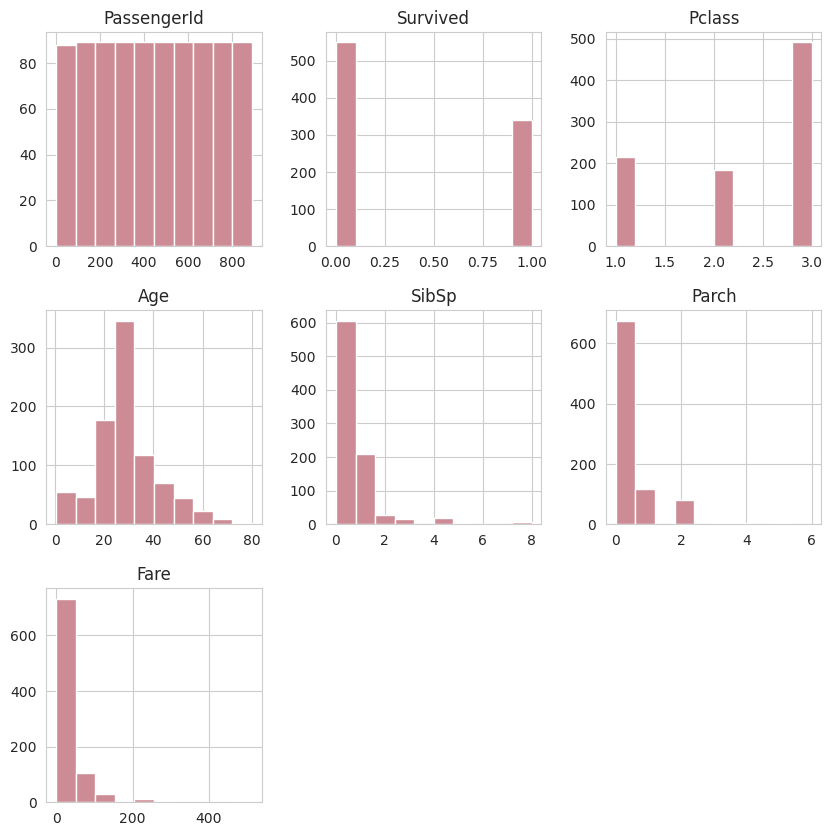

In [109]:
df.hist(figsize=(10,10),color="#CD8C95")
plt.show()

<ipython-input-110-a6c8f3d159dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="PuBu")


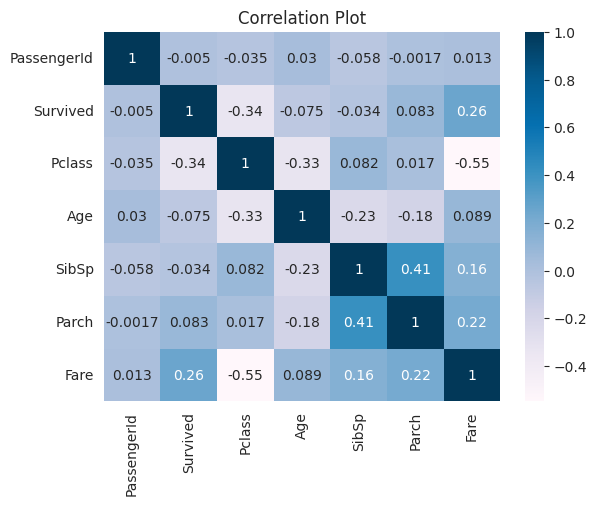

In [110]:
sns.heatmap(df.corr(),annot=True,cmap="PuBu")
plt.title("Correlation Plot")
plt.show()